# Tutorial 1: Ajustando distribuciones (univariadas)
### Por Santiago Velasco-Forero
email: velasco@cmm.ensmp.fr

Definición del Criterio de información de Akaike:

$AIC(Model,Data)= 2k - 2 \ln(\mathcal{L(Model,Data)})$ donde $\mathcal{L}$ es el máximo valor de la función de verosimilitud para el modelo estimado y $k$ el número de parámetros del modelo.

In [1]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

def AIC(distr, param, data):
    """Calcula el criterio de información de Akaike"""
    """https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike"""
    return 2*len(param)-2*np.sum(distr.logpdf(data, param[0], param[1], * param[2:]))

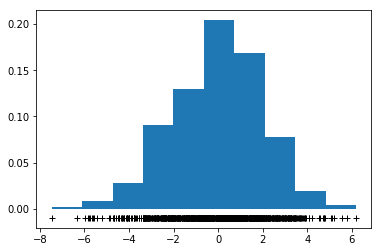

In [3]:
n=1000

#data1 = np.random.normal(10, 1, n)
#data2 = np.random.normal(5, 1, 100)
#data=np.concatenate([data1,data2])
#data = abs(np.random.normal(0, 2, n))

# Crear datos de una distribucion normal con ruido
data = np.random.normal(0, 2, n)

# Histograma de los datos


plt.hist(data, normed = True)
plt.plot(data, np.zeros(data.shape[0]) - 0.01, '+k')
plt.show()

Distribución: beta
Número de parámetros:  4
AIC:  4254.05692838004
**************************************************
Distribución: gamma
Número de parámetros:  3
AIC:  4271.3233965938725
**************************************************
Distribución: norm
Número de parámetros:  2
AIC:  4259.173705426743
**************************************************
Distribución: laplace
Número de parámetros:  2
AIC:  4328.284869296879
**************************************************
Distribución: johnsonsb
Número de parámetros:  4
AIC:  4254.039875766209
**************************************************
Distribución: johnsonsu
Número de parámetros:  4
AIC:  4253.130749971891
**************************************************


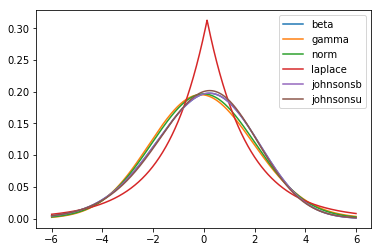

In [4]:
# Solamente para visualización. Valores para dibujar la distribución teórica
xmin=-6
xmax=6
lnspc = np.linspace(xmin, xmax, len(data))


distrNameList = ['beta', 'gamma', 'norm', 'laplace', 'johnsonsb', 'johnsonsu']

for distrName in distrNameList:
    distr = getattr(stats.distributions, distrName)
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrName)
    print('Distribución:',distrName)
    print('Número de parámetros: ',len(param))
    print('AIC: ',AIC(distr,param,data))
    print('*'*50)
                
plt.legend()                 
plt.show()
                 
                 
                 


In [5]:
#Carga todas la posible distribuciones que tienen la posibilidad de usar "fit"
distrlist=[]
for this in dir(stats):
    if "fit" in eval("dir(stats." + this +")"):
        distrlist.append(this)
print(distrlist)

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircula

Distribución: alpha
Número de parámetros:  3
AIC:  7351.154860713534
**************************************************
Distribución: anglit
Número de parámetros:  2
AIC:  4627.207227201878
**************************************************
Distribución: arcsine
Número de parámetros:  2
AIC:  5982.155754888325
**************************************************
Distribución: argus
Número de parámetros:  3
AIC:  4669.133355880899
**************************************************
Distribución: beta
Número de parámetros:  4
AIC:  4254.05692838004
**************************************************
Distribución: betaprime
Número de parámetros:  4
AIC:  4265.909247517125
**************************************************
Distribución: bradford
Número de parámetros:  3
AIC:  5371.475756026439
**************************************************
Distribución: burr
Número de parámetros:  4
AIC:  4503.685746912287
**************************************************
Distribución: burr12
Número de pa

Número de parámetros:  5
AIC:  6966.2562479545295
**************************************************
Distribución: nct
Número de parámetros:  4
AIC:  4253.230838192261
**************************************************
Distribución: ncx2
Número de parámetros:  4
AIC:  4284.332247198413
**************************************************
Distribución: norm
Número de parámetros:  2
AIC:  4259.173705426743
**************************************************
Distribución: norminvgauss
Número de parámetros:  4
AIC:  4260.771261537468
**************************************************
Distribución: pareto
Número de parámetros:  3
AIC:  7491.499127472753
**************************************************
Distribución: pearson3
Número de parámetros:  3
AIC:  4252.056896826252
**************************************************
Distribución: powerlaw
Número de parámetros:  3
AIC:  5079.463234040239
**************************************************
Distribución: powerlognorm
Número de parámetros: 

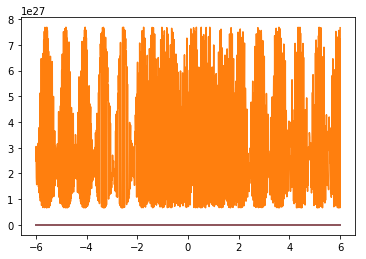

In [6]:
listAIC=[]
for distrName in distrlist:
    distr = getattr(stats.distributions, distrName)
    try:  
        print('Distribución:',distrName)
        param = distr.fit(data)
        pdf = distr.pdf(lnspc, *param)
        plt.plot(lnspc, pdf, label=distrName)
        print('Número de parámetros: ',len(param))
        res=AIC(distr,param,data)
        if res<0:
            res=np.Inf
        listAIC.append(res)
        print('AIC: ',res)
        print('*'*50)
    except:
        print('Error')
        listAIC.append(np.Inf)
        

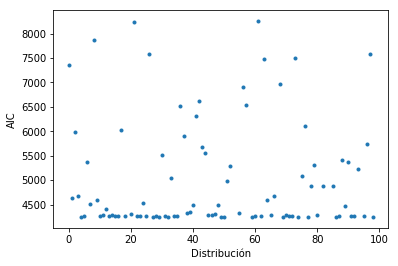

In [7]:
plt.plot(listAIC,'.')
plt.ylim([min(listAIC)*.95,min(listAIC)*2])
plt.ylabel('AIC')
plt.xlabel('Distribución')
plt.show()

In [8]:
bestDist=np.array(distrlist)[np.argsort(np.array(listAIC))[0:10]]
bestDist

array(['gausshyper', 'skewnorm', 'powernorm', 'loggamma', 'pearson3',
       'johnsonsu', 'nct', 'gengamma', 'johnsonsb', 'beta'], dtype='<U15')

Distribución: gausshyper
Número de parámetros:  6
AIC:  4236.724602784978
**************************************************
Distribución: skewnorm
Número de parámetros:  3
AIC:  4250.8223622341775
**************************************************
Distribución: powernorm
Número de parámetros:  3
AIC:  4251.0988115546625
**************************************************
Distribución: loggamma
Número de parámetros:  3
AIC:  4251.788112560507
**************************************************
Distribución: pearson3
Número de parámetros:  3
AIC:  4252.056896826252
**************************************************
Distribución: johnsonsu
Número de parámetros:  4
AIC:  4253.130749971891
**************************************************
Distribución: nct
Número de parámetros:  4
AIC:  4253.230838192261
**************************************************
Distribución: gengamma
Número de parámetros:  4
AIC:  4253.858755263764
**************************************************
Distribución: j

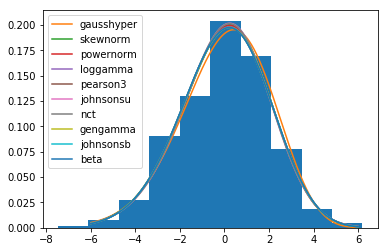

In [9]:
plt.hist(data, normed=True)

distrNameList = list(bestDist)

for distrName in distrNameList:
    distr = getattr(stats.distributions, distrName)
    param = distr.fit(data)
    pdf = distr.pdf(lnspc, *param)
    plt.plot(lnspc, pdf, label=distrName)
    print('Distribución:',distrName)
    print('Número de parámetros: ',len(param))
    print('AIC: ',AIC(distr,param,data))
    print('*'*50)
                
plt.legend()                 
plt.show()

### Homework
A. Los resultados de este experimento dependen de los datos generados. Repita el experimento  $n=1000$, $\mathcal{N}(\mu=10$, $\sigma=1$), 250 veces y describa cuales son las distribuciones que mejor ajustan en el sentido de tener más bajo y menor varianza en el AIC.

B. Repita A el sentido de tener más bajo BIC (Criterio de informacion Bayesiana). $BIC(Model,Data)= \ln(n)k - 2 \ln(\mathcal{L(Model,Data)})$

C. Realice (A) (Se debe mantener $n=1000$), incluyendo datos contaminados de una normal con parametros ($\mu=$5,$\sigma$=1):

    a) (1%) 
    
    b) (5%)
    
    c) (10%)
    
Cuales son las distribuciones que mejor ajustan en el sentido de tener más bajo y menor varianza en el AIC?
    

D. Analice la robustes del ajuste de las distribuciones por medio del AIC. Es decir, compare la diferencia de AIC para distribuciones con/sin contaminaciones, usando el mismo tipo de simulaciones en 2. 

E. Repita (A-C) generando $n=1000$ datos de la distribución $abs(\mathcal{N}(\mu=0, \sigma=2)$ donde abs significa valor absoluto.